# Feature Extraction

### Reading data

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# load the data
data_dir = os.getcwd() + '\\data\\'

# reading dataset
df = pd.read_csv(data_dir + '2.csv')

### Some Ideas

The chart in previous presentation shows that the values of distance, frequency of motion pulses, and spikes of CO2 are correlated.

Also, we can conclude:

- **CO2 Level**:
    - Data is continuous.
    - The n-th step differentiate could be useful.
    - Moving average could be useful.
- **Motion**:
    - Data is discrete binary pulses.
    - Data represents if the sensor detects any motion or not.
    - There is no need to be normalized.
    - Pulse frequencies may be useful.
    - The n-th step accumulative value could be helpful.
    - Moving average could be useful.
- **Distance**:
    - There are many -1's in distance data.
    - It is high probable -1's are not correct (distance is an absolute value)
    - We can safely change -1's to 0 or NAN.
    - The n-th step differentiate could be useful.
    - The frequency of the data variation could be helpful.
    - We may extract a binary feature: 0 when the value is -1 and 1 instead of positive values.
    - The n-th step accumulative value could be helpful.
    - Moving average could be useful.

### Differentiated data extraction

In [24]:
df['co2_d'] = np.gradient(df.co2_n)
df['distance_d'] = np.gradient(df.distance_n)

### Generating distance binary values 

In [25]:
df['distance_p'] = np.where(df['distance'] == 0, 0, 1)

C:\Users\amirp\Anaconda3\lib\site-packages\seaborn\linearmodels.py:1290: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
C:\Users\amirp\Anaconda3\lib\site-packages\seaborn\linearmodels.py:1356: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


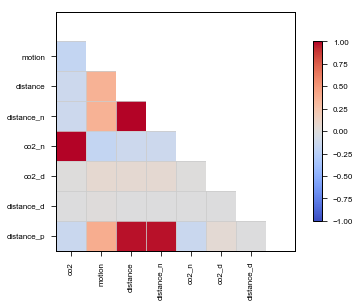

In [31]:
import seaborn as sns

kw = {'axes.edgecolor': '0', 'text.color': '0', 'ytick.color': '0', 'xtick.color': '0',
      'ytick.major.size': 5, 'xtick.major.size': 5, 'axes.labelcolor': '0'}

sns.set_style("whitegrid", kw)
ax = sns.linearmodels.corrplot(df, annot=False, diag_names=False)
plt.show()

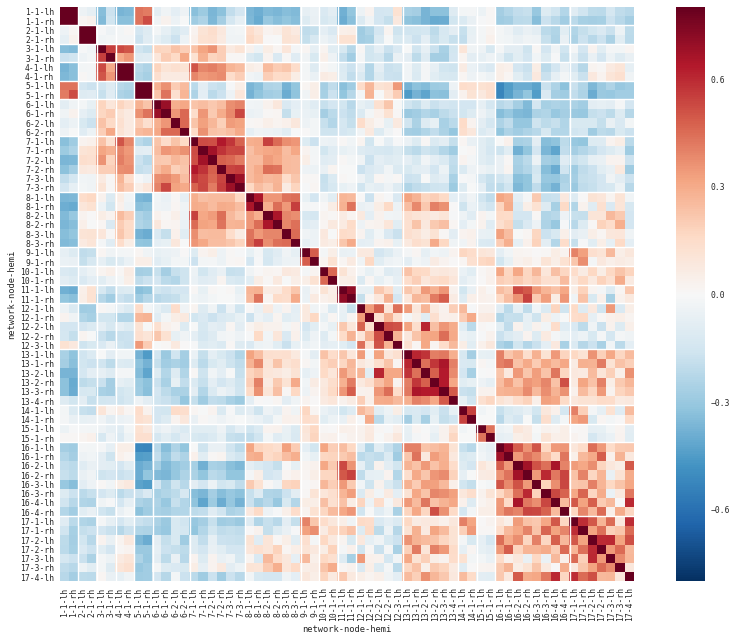

In [12]:
import seaborn as sns
sns.set(context="paper", font="monospace")

# Load the datset of correlations between cortical brain networks
#df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)
corrmat = df.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)

# Use matplotlib directly to emphasize known networks
networks = corrmat.columns.get_level_values("network")
for i, network in enumerate(networks):
    if i and network != networks[i - 1]:
        ax.axhline(len(networks) - i, c="w")
        ax.axvline(i, c="w")
f.tight_layout()
plt.show()
#sns.heatmap(data, square='True')
#plt.yticks(rotation = 0)
#plt.xticks(rotation = 90)
#plt.show()

In [9]:
data = df
data = data.drop('time', 1)
data = data.drop('co2', 1)
data = data.drop('distance', 1)
correlations = data.corr()
# plot correlation matrix
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,6,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.show()

KeyError: 'time'

In [ ]:
def dif(x,y):
    dy = np.zeros(y.shape,np.float)
    dy[0:-1] = np.diff(y)/np.diff(x)
    dy[-1] = (y[-1] - y[-2])/(x[-1] - x[-2])
    return dy
y = co2.astype(np.float64)
d = np.abs(dif(np.arange(11446), y))

plt.figure(figsize=(10,6))
plt.plot(d)
plt.xlabel('Time Steps')
plt.ylabel('CO2 Levels')
plt.show()

In [ ]:
normy = y / np.linalg.norm(y)
plt.figure(figsize=(10,6))
plt.plot(normy)
plt.xlabel('Time Steps')
plt.ylabel('CO2 Levels')
plt.show()

normd = d / np.linalg.norm(d)
plt.figure(figsize=(10,6))
plt.plot(normd)
plt.xlabel('Time Steps')
plt.ylabel('CO2 Levels')
plt.show()